In [1]:
import pandas as pd
import re
import seaborn as sns


In [2]:
df = pd.read_csv('BNZchat_Day1.csv')
df.head()

,time,author,comment
0,09:02:45,Jason Downing,http://www.lter.uaf.edu/sympo/2020/SpeedTalksB...
1,09:05:17,Merritt Turetsky (she/her),Awesome. Welcome talented artists! We are ha...
2,09:05:30,Theresa Woldstad,Thank you for having us!
3,09:30:28,mark waldrop,Can we see the entire order? (I”ll need to run...
4,09:30:42,mark waldrop,I see it


In [32]:
#collecting links shared in the chat
links = [] 

for comment in df['comment']:
    links.extend(re.findall(r'(https?://[^\s]+)', comment))
links

['http://www.lter.uaf.edu/sympo/2020/SpeedTalksBattingOrder_2020-11-16.pdf',
 'https://docs.google.com/spreadsheets/d/1hWJTM6cgUi2sRjPH27gLqbcdOQdoHALX/edit#gid=1513251827',
 'https://drive.google.com/drive/folders/1e9v9tdhb6qBGoSbxFWw4hAqpQSy9hHTT',
 'https://docs.google.com/document/d/1CNLFGgN28phnHC7nN7lZd1uOPwMwGckLqATgSLoh32s/edit?usp=sharing',
 'https://twitter.com/zodpaint/status/1328368171154239492',
 'https://akfireconsortium.files.wordpress.com/2020/07/afsc_rb_2020_1.pdf',
 'https://drive.google.com/file/d/1hWJTM6cgUi2sRjPH27gLqbcdOQdoHALX/view?usp=sharing']

In [45]:
#counting comments by each author
df.groupby(df['author'])['author'].count().sort_values(ascending=False)

author
Merritt Turetsky (she/her)    28
Mary Beth Leigh               19
Michelle Cailin Mack          14
Jessie Robertson              11
Christa Mulder                10
Brian Buma                     9
Roger Ruess                    8
Helene Genet                   7
Mario Muscarella (he/him)      7
William Cox                    6
Teresa Hollingsworth           5
Jay Jones                      4
MC Leewis (USGS)               4
mark waldrop                   3
Brody Lane Shappell            2
Elena Sparrow                  2
msluc                          2
ursel schuette                 2
Moss (Jen)                     2
Randi Jandt                    2
Theresa Woldstad               2
Todd Brinkman                  2
Alison York                    2
Mark Winterstein               1
Maite Agopian (she/her)        1
Katie Craney                   1
Rebecca Eliza Hewitt           1
Jeremy Pataky                  1
Sean Dowgray                   1
Jason Downing                  1
Tam

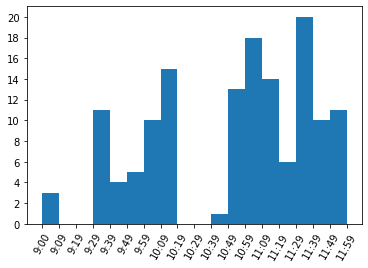

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#convert string to time
df['time'] = pd.to_datetime(df['time'],format= '%H:%M:%S' ).dt.time


# get a list of the times
times = [t.hour + t.minute/60. for t in df['time']]

# set the time interval required (in minutes)
tinterval = 10.

# find the lower and upper bin edges (on an integer number of 10 mins past the hour)
lowbin = np.min(times) - np.fmod(np.min(times)-np.floor(np.min(times)), tinterval/60.)
highbin = np.max(times) - np.fmod(np.max(times)-np.ceil(np.max(times)), tinterval/60.)
bins = np.arange(lowbin, highbin, tinterval/60.)  # set the bin edges

# create the histogram
plt.hist(times, bins=bins)
ax = plt.gca()  # get the current plot axes
ax.set_xticks(bins)  # set the position of the ticks to the histogram bin edges

# create new labels in hh:mm format (in twelve hour clock)
newlabels = []
for edge in bins:
    h, m = divmod(edge%12, 1)  # get hours and minutes (in 12 hour clock)
    newlabels.append('{0:01d}:{1:02d}'.format(int(h), int(m*60)))  # create the new label

ax.set_xticklabels(newlabels, rotation = 60)  # set the new labels
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 2))


In [20]:
#Creating network graph 
# https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675

dfchatters = df[['author']]
dfchatters['responder'] = df['author'].shift(periods=-1)

dfchatters = dfchatters.dropna()
dfchatters.tail()

<ipython-input-20-a90df37b0d32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchatters['responder'] = df['author'].shift(periods=-1)


,author,responder
158,Jeremy Pataky,Brody Lane Shappell
159,Brody Lane Shappell,Sean Dowgray
160,Sean Dowgray,Mark Winterstein
161,Mark Winterstein,Elena Sparrow
162,Elena Sparrow,jamie


In [37]:
import networkx as nx
G = nx.DiGraph()

G = nx.from_pandas_edgelist(dfchatters, 'author', 'responder')

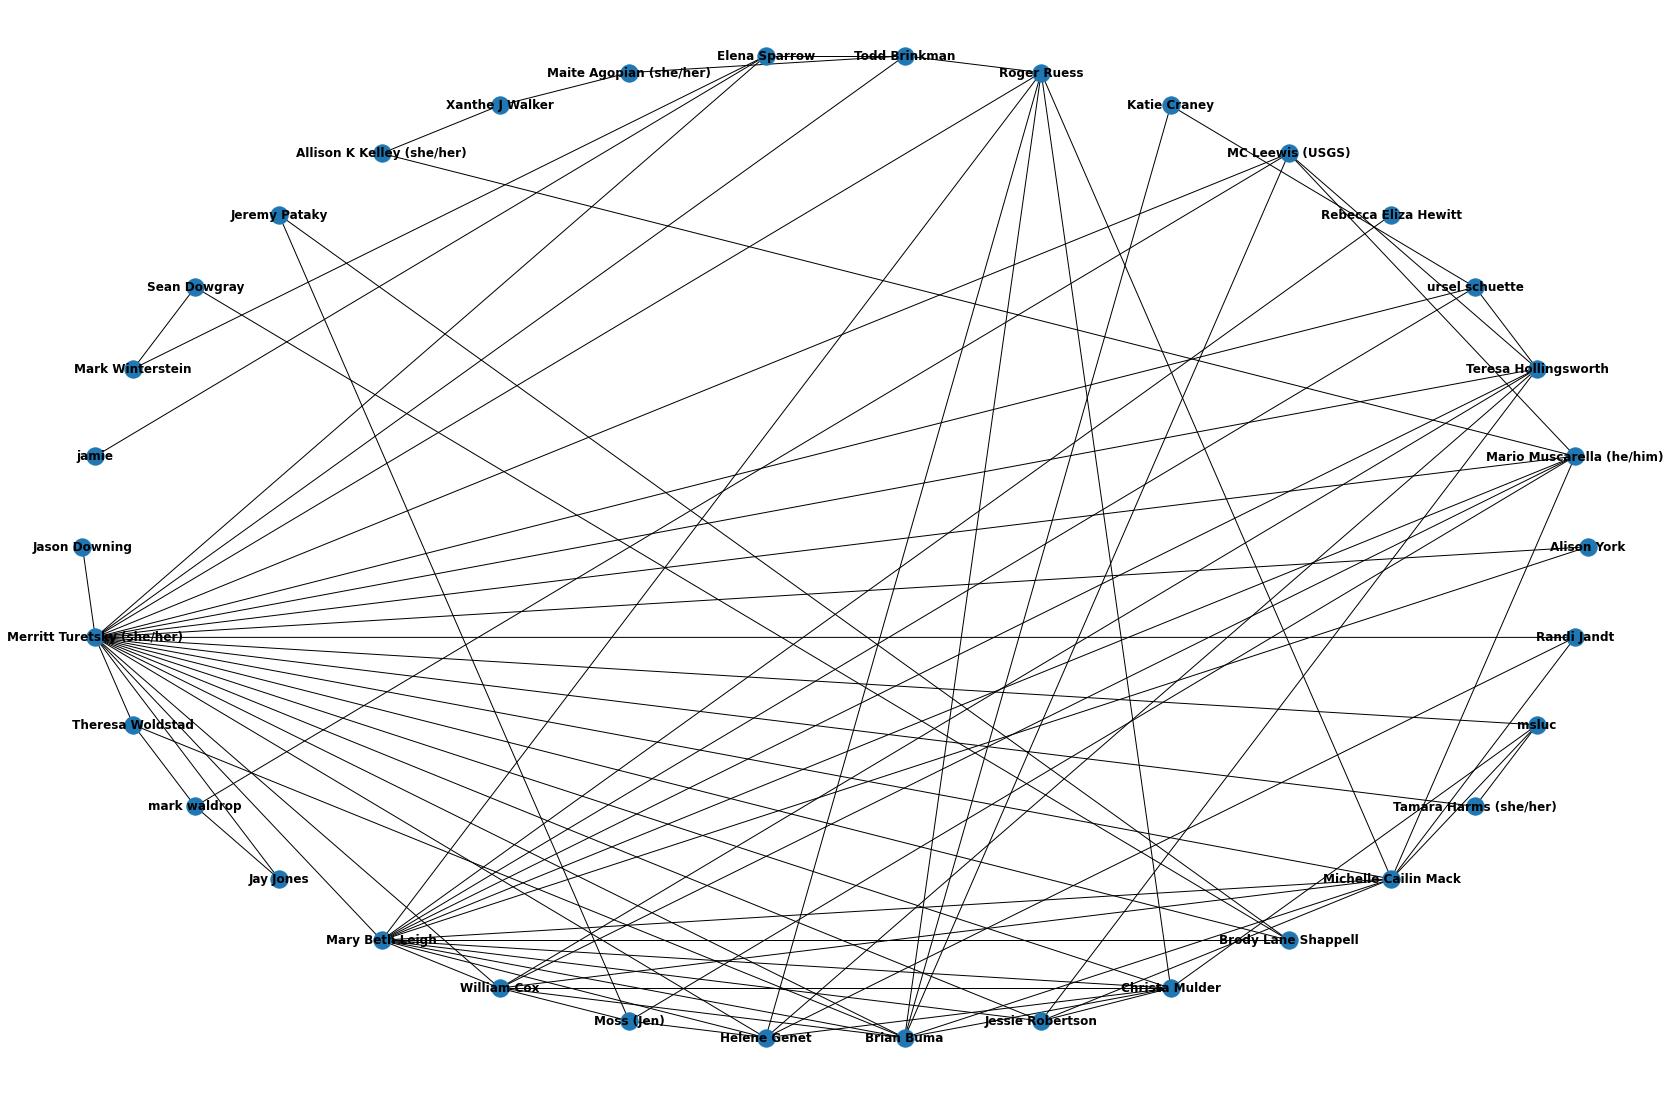

In [38]:
from matplotlib.pyplot import figure

figure(figsize=(23, 15))
nx.draw_shell(G, with_labels=True,font_weight='bold')

In [ ]:
graph = nx.from_pandas_dataframe(dfchatters, source = 'Source Airport', target = 'Dest Airport',
                        edge_attr = 'number of flights',create_using = nx.DiGraph())


plt.figure(figsize = (10,9))

nx.draw_networkx(graph)

plt.savefig("./images/map_0.png", format = "png", dpi = 300)

plt.show()